<a href="https://colab.research.google.com/github/yinnyC/seattle-crime-stats-analysis/blob/main/Seattle_Crime_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the following command to load in data with kaggle API.


1.   Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
2.   Click on Create New API Token - It will download kaggle.json file on your machine.
3.   Choose the kaggle.json file that you downloaded



In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yingyinchang","key":"1c791797ae0740e2be9cf8bdf6a3e8e3"}'}

Make directory named kaggle, copy kaggle.json file there and change the permission of the file.
Download the dataset and unzip it in the seattle-crime-stats folder we just created.


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle datasets download -d city-of-seattle/seattle-crime-stats
! mkdir seattle-crime-stats
! unzip seattle-crime-stats.zip -d seattle-crime-stats

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-12 15:32:48           7349  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4453  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1507  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2205  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [196]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
matadata_crime_96_07_url = 'seattle-crime-stats/socrata_metadata_seattle-crime-stats-by-1990-census-tract-1996-2007.json'
matadata_crime_08_now_url = 'seattle-crime-stats/socrata_metadata_seattle-crime-stats-by-police-precinct-2008-present.json'

Load in the two dataset and print out their columns.

In [ ]:
crime_96_07_url = 'seattle-crime-stats/seattle-crime-stats-by-1990-census-tract-1996-2007.csv'
crime_08_now_url = 'seattle-crime-stats/seattle-crime-stats-by-police-precinct-2008-present.csv'
crime_stats1_df = pd.read_csv(crime_96_07_url)
crime_stats2_df = pd.read_csv(crime_08_now_url)

# Dataset1 - Data Exploration

## Study each attribute and its characteristics

In [ ]:
# Matadata information
with open(matadata_crime_96_07_url) as json_data:
  data = json.load(json_data)
  columns_info = data['columns']
  print('**** Matadata about dataset1 ****')
  for entry in columns_info:
    print(f"{entry['fieldName']}: {entry['description']}")

# See the first rows of the dataset
display(crime_stats1_df.head(10))

# Generate descriptive statistics.
display(crime_stats1_df.describe()) 

crime_stats1_df.shape

# ^ Found Typo: The min value of Report_Year_Total is nagative 

**** Matadata about dataset1 ****
report_year: Reporting Year
census_tract_1990: The 1990 census tract the reported crimes occurred in
crime_type: Type of crime
report_year_total: Total number of crimes reported


,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2
5,1996,1.0,Residential Burglary,42
6,1996,1.0,Robbery,2
7,1996,1.0,Theft,293
8,1996,1.0,Vehicle Theft,53
9,1996,1.0,Violent Crimes Total,15


,Report_Year,Census_Tract_1990,Report_Year_Total
count,14268.000000,14236.000000,14268.000000
mean,2001.327586,60.955128,75.137090
std,3.380528,34.680663,174.191326
min,1996.000000,1.000000,-2.000000
25%,1998.000000,31.000000,2.000000
50%,2001.000000,60.000000,19.000000
75%,2004.000000,91.000000,66.000000
max,2007.000000,121.000000,4372.000000


(14268, 4)

## Identify the Distribution

Report_Year_Total
-2          1
-1          8
 0       2155
 1        883
 2        535
         ... 
 3378       1
 3424       1
 3792       1
 4005       1
 4372       1
Length: 761, dtype: int64

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
1033,1996,81.0,Property Crimes Total,4372
1037,1996,81.0,Theft,4005
2263,1997,81.0,Property Crimes Total,3792
2267,1997,81.0,Theft,3424
2393,1997,93.0,Property Crimes Total,1580
3493,1998,81.0,Property Crimes Total,3378
3497,1998,81.0,Theft,2999
4723,1999,81.0,Property Crimes Total,3073
4727,1999,81.0,Theft,2709
5953,2000,81.0,Property Crimes Total,2571


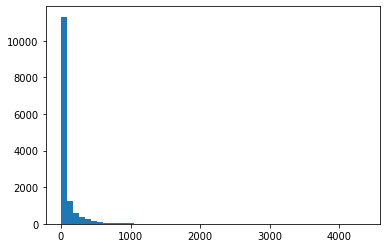

In [ ]:
# Graph with raw data
plt.hist(crime_stats1_df['Report_Year_Total'], bins=50)

# Use group by to see how Report_Year_Total data distribute
display(crime_stats1_df.groupby('Report_Year_Total').size())

# Check how extreme data looks like
crime_stats1_df[crime_stats1_df['Report_Year_Total'] > 1500] 

# From the graph, it doesn't look like a normal distribution

Fitting different Distributions and checking Goodness of fit based on Chi-square Statistics - using the function created by [Abhishek](https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802)

In [ ]:
# Standardizing the dataset
scaler = StandardScaler() 
removed_outliers = crime_stats1_df[(crime_stats1_df['Report_Year_Total'] > 0) & (crime_stats1_df['Report_Year_Total'] < 500)]
y_std = scaler.fit_transform(removed_outliers[['Report_Year','Report_Year_Total']])
size = len(removed_outliers)

dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

#dist_names = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print('\nDistributions listed by Betterment of fit:')
print('............................................')
print(results)

# perform poorly on all distrubution test

(1.7432074348952038, -1.6879440640169654, 1.892875272695028)

(-9.436394714675217e-15, 1.0)

(21101706.607965946, 16114223.098076593, 16114223.54380617)



/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(4.0840294938171775, 1947100.1965744442, -1.9925067755075352, 950138.6867708839)

(0.13064186005923334, -2.7374850364470413, 20.954119094311395)

(-1.572574738983179, 6.096692814899793)

(4.1162857141817515, -1.9975906160051715, 0.48529014569301376)

(-1.572574738983179, 1.5725747389831697)

(0.3628266576409525, -2.6533088056590586, 2.483801439548703)

(0.9857879713053004, -9.26914411142632e-15, 0.9845632024117614)

(0.18809299422284637, -1.875039634730673, 6.399790016478747)


Distributions listed by Betterment of fit:
............................................
   Distribution    chi_square
7         expon  29526.630277
0   weibull_min  33007.058518
8       lognorm  33276.789231
4      invgauss  33319.725383
3          beta  33331.299055
9      pearson3  33346.468654
6         gamma  33346.847892
2   weibull_max  33605.351686
1          norm  42852.158124
10       triang  50821.021810
5       uniform  64505.973341


In [ ]:
print('\nDistributions listed by Betterment of fit:')
print('............................................')
results[results['chi_square']< 30000]


Distributions listed by Betterment of fit:
............................................


,Distribution,chi_square


## Detecting Missing Number

,Report_Year_Total
Report_Year,
1996,110776
1997,112761
1998,105237
1999,99099
2000,90170
2001,91846
2002,92631
2003,100305
2004,93130


,Report_Year_Total
Report_Year,
1996,1230
1997,1230
1998,1230
1999,1230
2000,1230
2001,1230
2002,1230
2003,1230
2004,1230


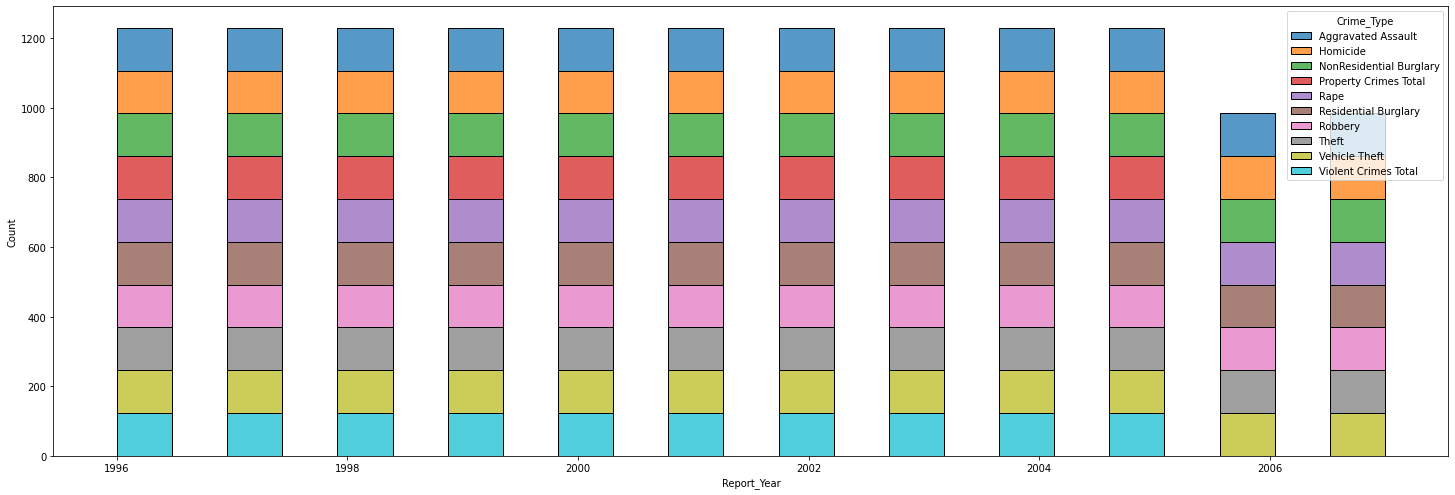

In [ ]:
# How does the number of crime change over the years
numOfCrime_year = crime_stats1_df[['Report_Year','Report_Year_Total']].groupby(['Report_Year']).sum()
display(numOfCrime_year)

# Guessing: Maybe year 2006 and 2007 has less data
display(crime_stats1_df[['Report_Year','Report_Year_Total']].groupby(['Report_Year']).count())
# Correct: All the other Report_Year have 1230 rows while 2006 & 2007 only have 984
# In year 2006 and 2007, there is no Violent Crimes Total and Property Crimes Total data
sns.histplot(data=crime_stats1_df, x="Report_Year",hue="Crime_Type",multiple="stack")

# Dataset1 - Data Cleaning 





## Correct Typo

The negative values in Report_Year_Total column

In [ ]:
# Modify all the negative numbers with abs()
filtered_df = crime_stats1_df.copy()
filtered_df['Report_Year_Total'] = filtered_df['Report_Year_Total'].apply(lambda x:abs(x))

## Remove Missing Data

Property Crimes Total and Violent Crimes Total

In [ ]:
# Filter out Missing rows
filtered_df = filtered_df[(filtered_df['Crime_Type']!= 'Property Crimes Total')& (filtered_df['Crime_Type']!= 'Violent Crimes Total')]

# Dataset1 - Data Analysis / Visualization

## How does the total number of crime changed over the years

,Report_Year_Total
Report_Year,
1996,55268
1997,56272
1998,52531
1999,49468
2000,45001
2001,45816
2002,46212
2003,50051
2004,46444


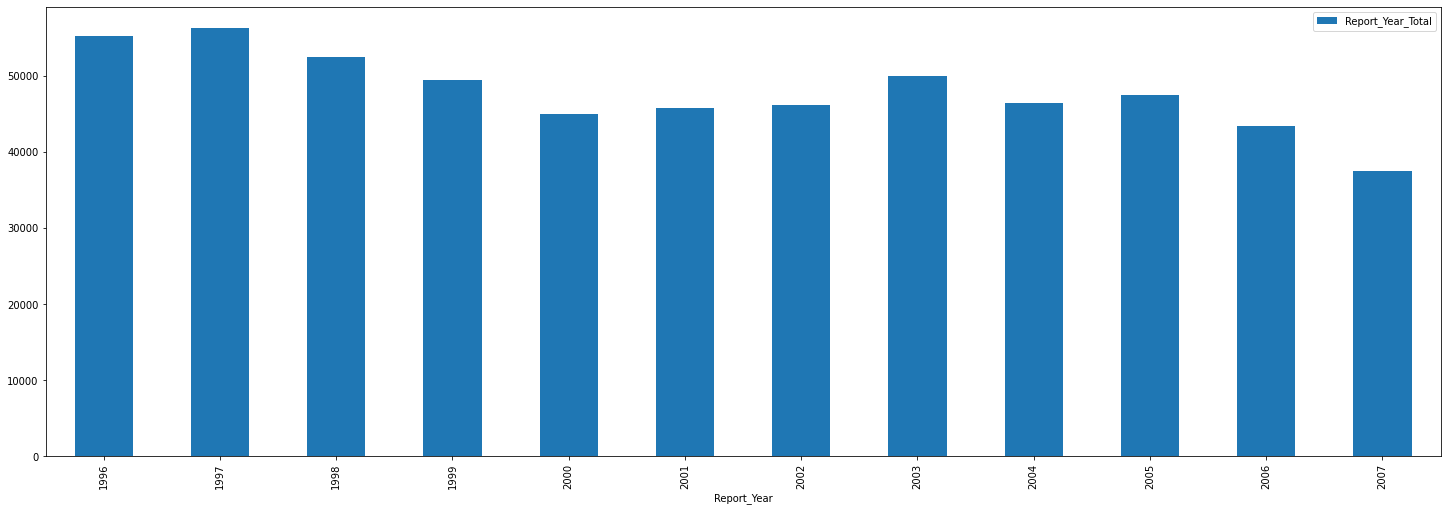

In [ ]:
# Compare the data again with no Violent Crimes Total and Property Crimes Total Entries
filtered_numOfCrime_year = filtered_df[['Report_Year','Report_Year_Total']].groupby(['Report_Year']).sum()
display(filtered_numOfCrime_year) 
filtered_numOfCrime_year.plot.bar() # The Report_Year_Total was decreasing over the years.

## Number of reports changed over the years by crime_type

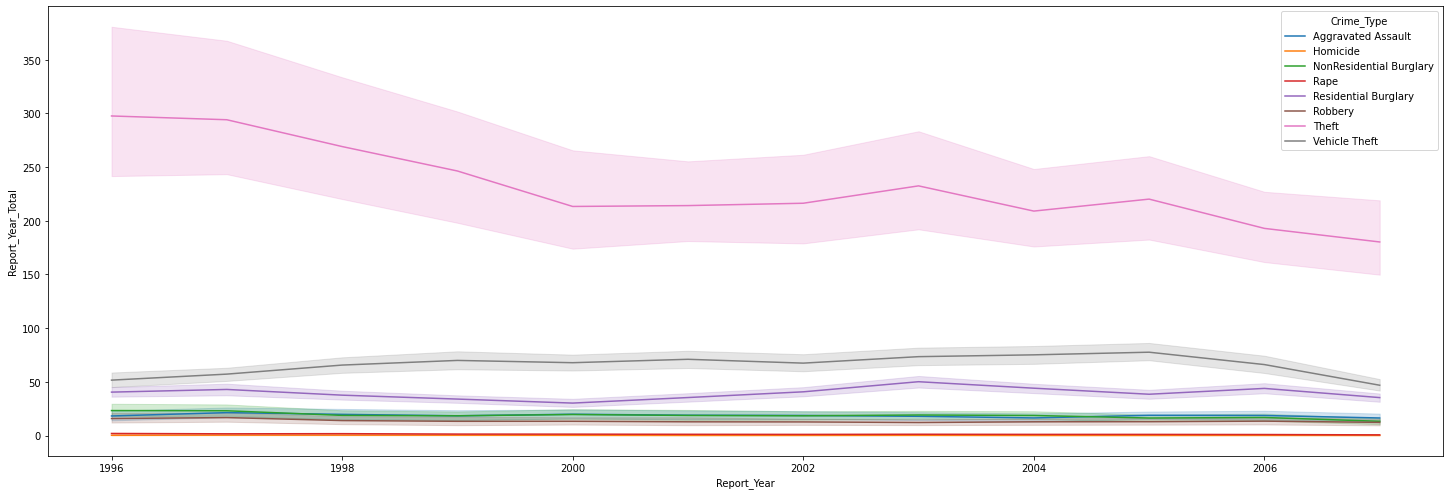

In [ ]:
# An overview of how the number of reported cases of each crime type over the years
sns.lineplot(data=filtered_df, x="Report_Year", y="Report_Year_Total",hue="Crime_Type")

## What's the total cases of each crime type 


,Report_Year_Total
Crime_Type,
Aggravated Assault,27523
Homicide,401
NonResidential Burglary,27649
Rape,1914
Residential Burglary,58238
Robbery,19981
Theft,342627
Vehicle Theft,97177


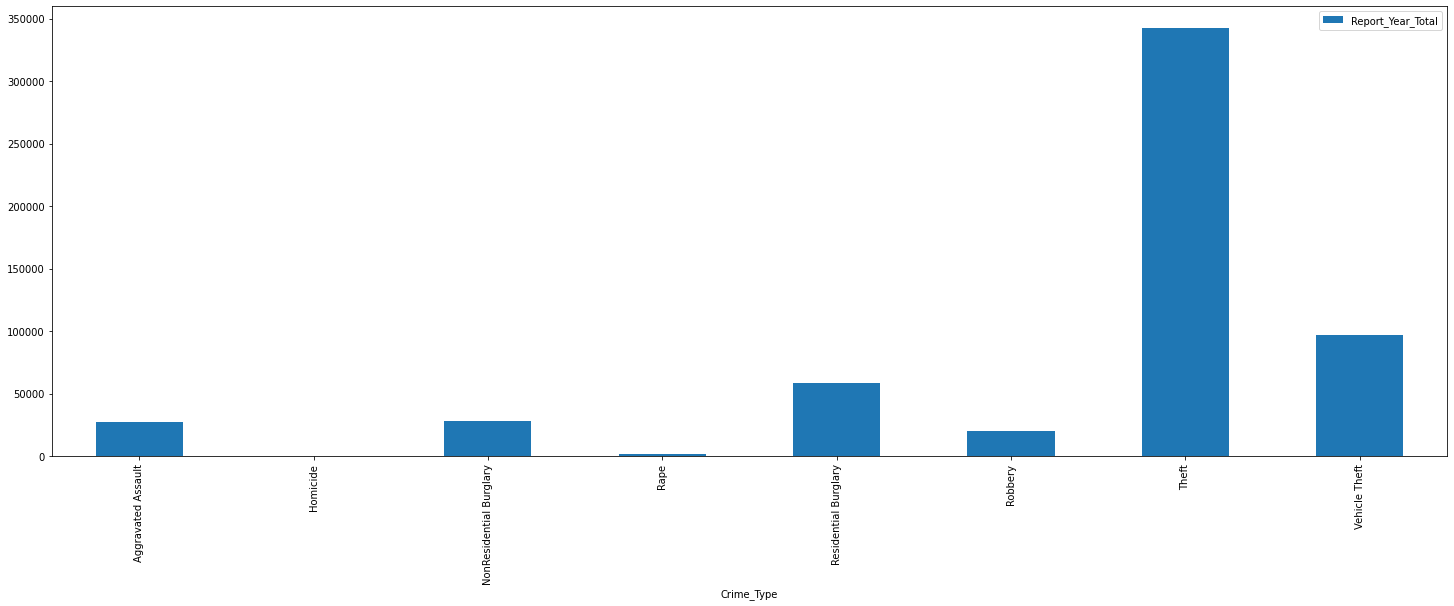

In [ ]:
total_crime_counts = filtered_df[['Crime_Type','Report_Year_Total']].groupby(['Crime_Type']).sum()
total_crime_counts
display(total_crime_counts) 
total_crime_counts.plot.bar()

## How cases distributed according to Census_Tract

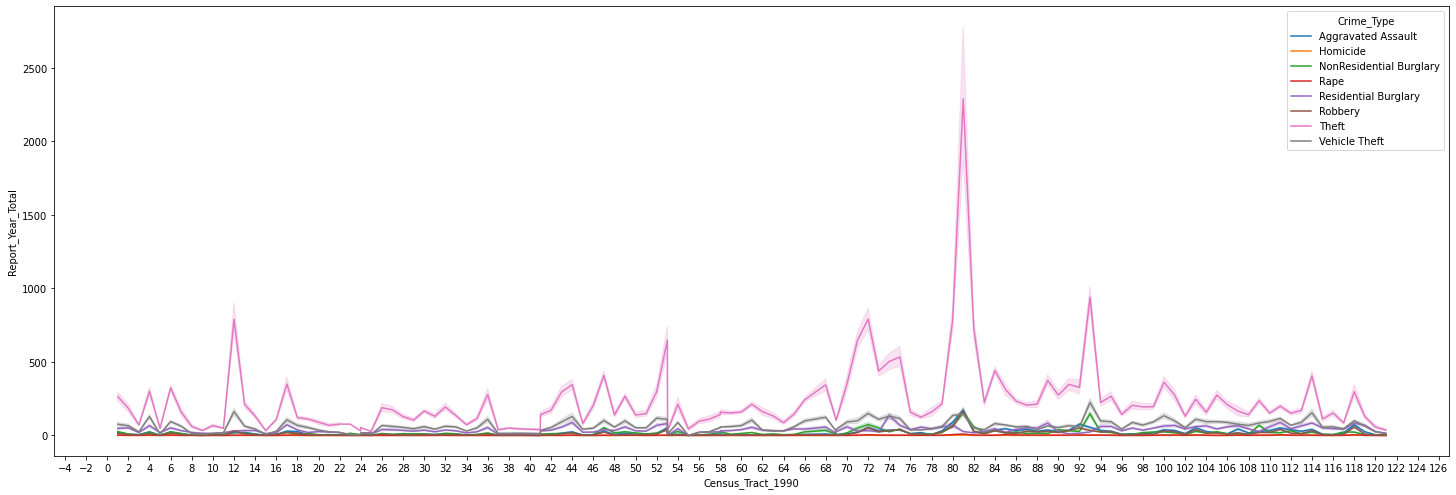

In [ ]:
rcParams['figure.figsize'] = 25,8.27
Census_Tract_d = sns.lineplot(data=filtered_df, x="Census_Tract_1990", y="Report_Year_Total",hue="Crime_Type" )
Census_Tract_d.xaxis.set_major_locator(ticker.MultipleLocator(2))
Census_Tract_d.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Dataset1 Findings
*   The number crime report was decreasing over the years.
*   Census_Tract 37-41 are the relatively safer areas
*   Census_Tract 79-81 are the most dangerous areas
*   Theft are the top two common crime types





# Dataset2 - Data Exploration

## Study each attribute and its characteristics

In [ ]:
# Matadata about dataset2
with open(matadata_crime_08_now_url) as json_data:
  data = json.load(json_data)
  columns_info = data['columns']
  print('**** Matadata about dataset2 ****')
  for entry in columns_info:
    print(f"{entry['fieldName']}: {entry['description']}")

# See the first rows of the dataset
display(crime_stats2_df.head(10))

# Generate descriptive statistics.
display(crime_stats2_df.describe()) 

crime_stats2_df.shape

# Found typo - Nagative Number in STAT_VALUE

**** Matadata about dataset2 ****
police_beat: The police beat for reported crimes.
crime_type: Type 1 Crime committed
crime_description: Description of the crime type
stat_value: Number of times crime occurred in a beat for reported month
report_date: The reported month of the crime.
sector: Police Sector
precinct: Police Precinct
row_value_id: Unique identifier 


,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368
5,S3,Burglary,Burglary,11,2014-04-30T00:00:00.000,S,SE,27237
6,G3,Assault,Assault,1,2014-04-30T00:00:00.000,G,E,26422
7,R3,Homicide,Homicide,0,2014-04-30T00:00:00.000,R,SE,27119
8,O1,Rape,Rape,1,2014-04-30T00:00:00.000,O,SE,26588
9,W3,Burglary,Burglary,6,2014-04-30T00:00:00.000,W,SW,27349


,STAT_VALUE,Row_Value_ID
count,27125.000000,27125.000000
mean,8.413714,13805.159263
std,14.046848,7993.009161
min,-3.000000,1.000000
25%,0.000000,6908.000000
50%,3.000000,13808.000000
75%,9.000000,20736.000000
max,137.000000,27622.000000


(27125, 8)

In [ ]:
crime_type = set(crime_stats2_df['CRIME_TYPE'])
Police_Beat = set(crime_stats2_df['Police Beat'])
CRIME_DESCRIPTION = set(crime_stats2_df['CRIME_DESCRIPTION'])
Sector = set(crime_stats2_df['Sector'])
Precinct = set(crime_stats2_df['Precinct'])
print(f"Crime Type: {', '.join(crime_type)}")
print(f"Police Beat: {', '.join(Police_Beat)}")
print(f"CRIME DESCRIPTION: {', '.join(CRIME_DESCRIPTION)}")
print(f"Sector: {', '.join(Sector)}")
print(f"Precinct: {', '.join(Precinct)}")

Crime Type: Motor Vehicle Theft, Larceny-Theft, Burglary, Assault, Rape, Homicide, Robbery
Police Beat: D2, W3, K3, G2, K2, F3, W2, E2, G1, Q1, M1, C2, J2, R2, M2, R1, N3, L1, O3, L2, S3, C1, J1, C3, Q3, J3, U1, G3, E3, E1, W1, L3, B2, N2, O2, D1, Q2, U2, K1, B3, F1, N1, U3, B1, O1, R3, S1, D3, M3, F2, S2
CRIME DESCRIPTION: Vehicle Theft is theft of a car, truck, motorcycle or any motor vehicle., Larceny-Theft, Burglary, Assault, Rape, Homicide, Robbery
Sector: U, M, F, D, O, K, W, L, B, R, J, E, N, Q, S, C, G
Precinct: SE, E, N, SW, W


In [ ]:
# REPORT Update Once a Month and there are 357 entries in each month.
crime_stats2_df.groupby('REPORT_DATE').count()

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,Sector,Precinct,Row_Value_ID
REPORT_DATE,,,,,,,
2008-01-01T00:00:00.000,357,357,357,357,357,357,357
2008-02-01T00:00:00.000,357,357,357,357,357,357,357
2008-03-01T00:00:00.000,357,357,357,357,357,357,357
2008-04-01T00:00:00.000,357,357,357,357,357,357,357
2008-05-01T00:00:00.000,357,357,357,357,357,357,357
...,...,...,...,...,...,...,...
2013-12-01T00:00:00.000,357,357,357,357,357,357,357
2014-01-30T00:00:00.000,357,357,357,357,357,357,357
2014-02-28T00:00:00.000,357,357,357,357,357,357,357


## Identify the Distribution

STAT_VALUE
-3         1
-2         3
-1        32
 0      8096
 1      2513
        ... 
 125       1
 131       1
 133       1
 134       1
 137       1
Length: 123, dtype: int64

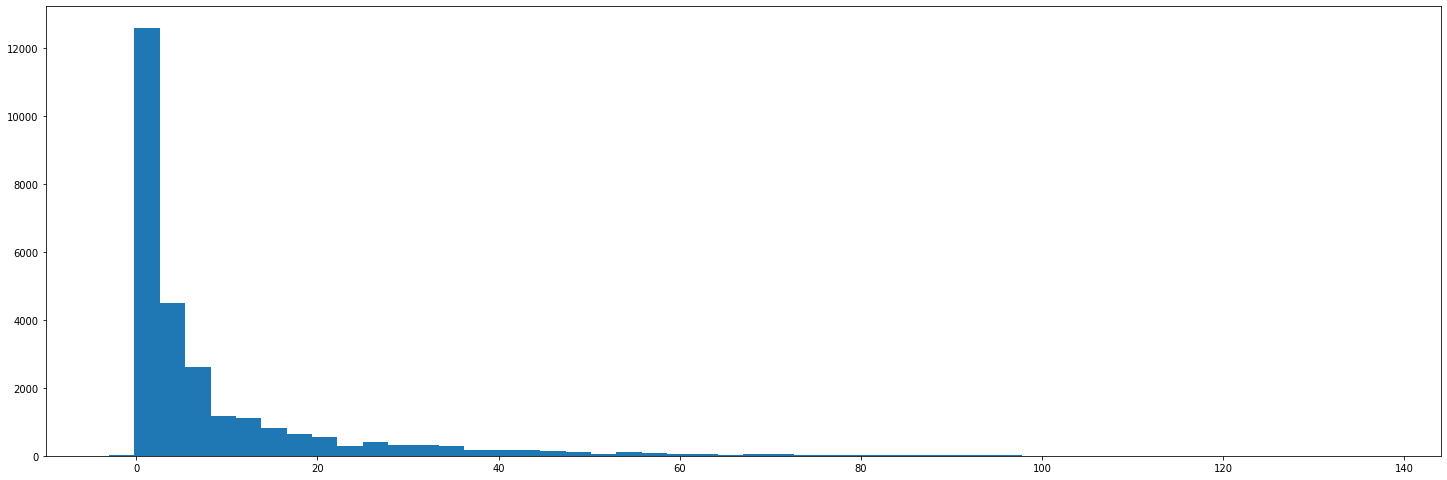

In [ ]:
# Graph with raw data
plt.hist(crime_stats2_df['STAT_VALUE'], bins=50)

# Use group by to see how Report_Year_Total data distribute
display(crime_stats2_df.groupby('STAT_VALUE').size())

In [ ]:
scaler2 = StandardScaler() 
Standardized_stats2 = crime_stats2_df.copy()
Standardized_stats2 = Standardized_stats2[Standardized_stats2['STAT_VALUE'] > 0]
Standardized_stats2['REPORT_DATE'] = pd.to_datetime(Standardized_stats2['REPORT_DATE']).astype(int)
y_std = scaler2.fit_transform(Standardized_stats2[['REPORT_DATE','STAT_VALUE']])
size = len(Standardized_stats2)

In [ ]:
# Standardizing the dataset
import datetime

dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']


chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print('\nDistributions listed by Betterment of fit:')
print('............................................')
print(results)



(1.824085342510732, -1.7555827060348532, 1.9742117573746787)

(9.996157478813182e-16, 1.0)

(602958572.1777828, 1265639158.1296463, 1265639158.3304594)



/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(4.246680338315443, 3114527.8529710895, -2.0385898088843186, 1497297.6815492031)

(0.12009685038019084, -2.842355113148335, 23.667194204413576)

(-1.6955618861741286, 9.789385349171004)

(4.484261264573933, -2.0751962764308676, 0.4627728669789338)

(-1.6955618861741286, 1.6955618861741297)

(0.3475534019197157, -2.761541383539675, 2.5990387757541003)

(0.9444790078328125, 1.007079030596513e-15, 0.9799896858874337)

(0.2597428784176882, -3.7166143165997845, 11.811029069153022)


Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
7         expon   47271.365089
0   weibull_min   51241.324827
3          beta   51405.813012
8       lognorm   51411.952430
4      invgauss   51477.280446
9      pearson3   51527.232981
6         gamma   51527.280024
1          norm   64460.445731
2   weibull_max  103336.863993
10       triang  107841.911144
5       uniform  124935.081615


## Detecting Missing Number

'2010-01-01' 357
'2010-02-01' 357
'2010-03-01' 357
'2010-04-01' 350
'2010-05-01' 357
'2010-06-01' 357


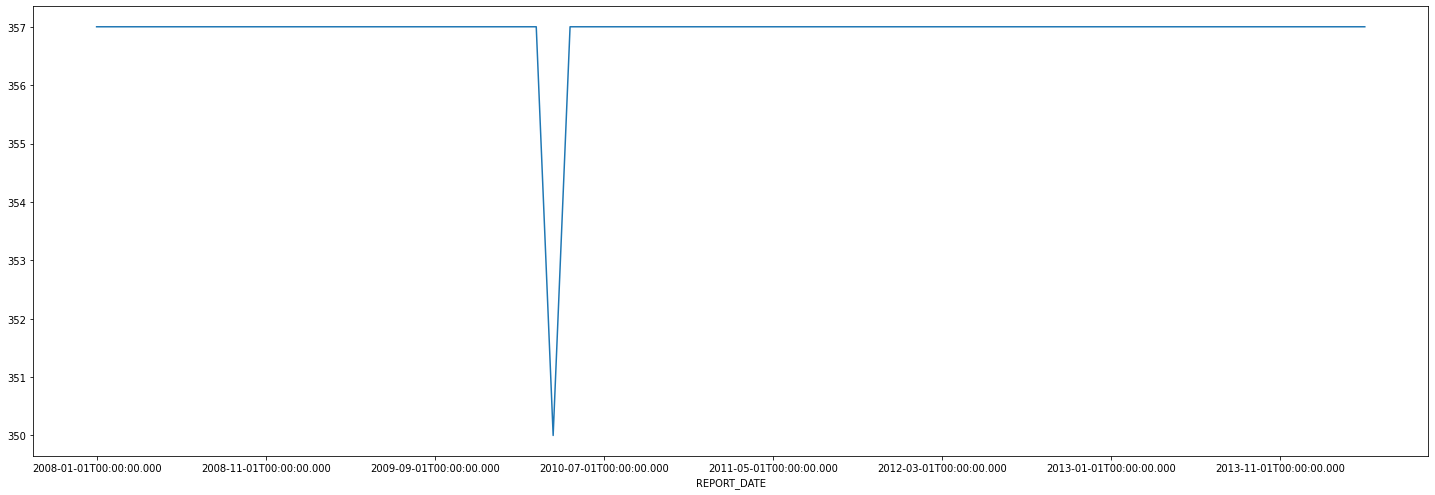

In [ ]:
# Examime if there are missing rows  
numOfCrime_time = crime_stats2_df[['REPORT_DATE','STAT_VALUE']].groupby(['REPORT_DATE']).size()

numOfCrime_time.plot() # There's a dip in 2010 spring
for month in range(1,7):
  print(f"'2010-0{month}-01' {numOfCrime_time[f'2010-0{month}-01T00:00:00.000']}")

# '2010-04-01' miss 7 rows

,STAT_VALUE
REPORT_DATE,
2008-01-01T00:00:00.000,2712
2008-02-01T00:00:00.000,2573
2008-03-01T00:00:00.000,2803
2008-04-01T00:00:00.000,2822
2008-05-01T00:00:00.000,3064
...,...
2013-12-01T00:00:00.000,3349
2014-01-30T00:00:00.000,3366
2014-02-28T00:00:00.000,2546


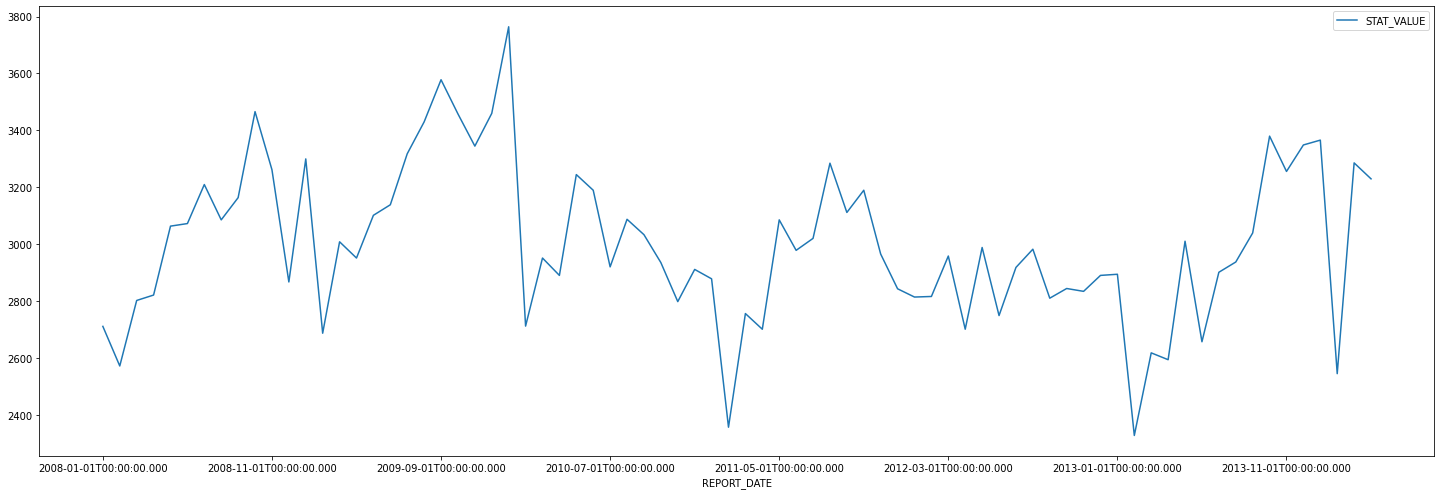

In [ ]:
numOfCrime_time = crime_stats2_df[['REPORT_DATE','STAT_VALUE']].groupby(['REPORT_DATE']).sum()
display(numOfCrime_time)
numOfCrime_time.plot()

# Dataset2 - Data Cleaning

In [210]:
# Modify all the negative numbers with abs()
filtered_df2 = crime_stats2_df.copy()
filtered_df2['STAT_VALUE'] = filtered_df2['STAT_VALUE'].apply(lambda x:abs(x))

# Remove unwanted data (Row_Value_ID)
filtered_df2 = filtered_df2.drop(columns=['Row_Value_ID'])

# Modify REPORT_DATE
filtered_df2['REPORT_DATE'] = filtered_df2['REPORT_DATE'].apply(lambda x:x[:10])

filtered_df2

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct
0,R2,Rape,Rape,1,2014-04-30,R,SE
1,K2,Assault,Assault,5,2014-04-30,K,W
2,M2,Homicide,Homicide,1,2014-04-30,M,W
3,C3,Robbery,Robbery,2,2014-04-30,C,E
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30,E,E
...,...,...,...,...,...,...,...
27120,B2,Homicide,Homicide,0,2008-01-01,B,N
27121,B1,Burglary,Burglary,15,2008-01-01,B,N
27122,B1,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",4,2008-01-01,B,N
27123,B1,Larceny-Theft,Larceny-Theft,35,2008-01-01,B,N


# Dataset2 Data Analysis / Visualization

## How the number of crime stats change every year

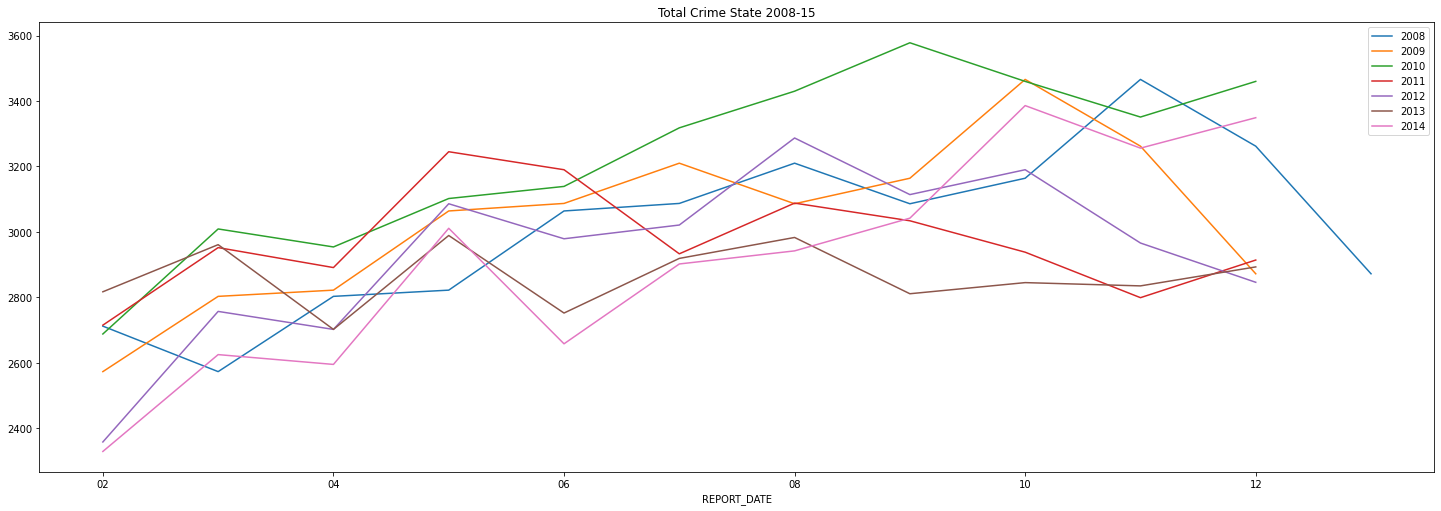

In [202]:
# See how the number of crime stats change every year
total_crime_each_year = []
# reformated_df = crime_stats2_df.copy()
reformated_df = filtered_df2.copy()

# Extract the target year and reformat the datetime
temp_df = reformated_df[(reformated_df['REPORT_DATE'] < '2009-01-01')]
temp_df.loc['REPORT_DATE'] = temp_df['REPORT_DATE'].apply(lambda x:x[5:7])

# Calculate and reformate the sum of crime stats
numOfCrime_sum = temp_df[['REPORT_DATE','STAT_VALUE']].groupby(['REPORT_DATE']).sum()
numOfCrime_sum.columns = ['2008']
ax = numOfCrime_sum.plot(title=f'Total Crime State 2008-15')

for i in range(9,15):
  temp_df = reformated_df[(reformated_df['REPORT_DATE'] < f'20{str(i).zfill(2)}-01-01') & (reformated_df['REPORT_DATE'] > f'20{str(i-1).zfill(2)}-01-01')]
  temp_df['REPORT_DATE'] = temp_df['REPORT_DATE'].apply(lambda x:x[5:7])
  numOfCrime_sum = temp_df[['REPORT_DATE','STAT_VALUE']].groupby(['REPORT_DATE']).sum()
  numOfCrime_sum.columns = [f'20{str(i).zfill(2)}']
  numOfCrime_sum.plot(ax=ax)


## How Crime Reports Distribute in Each Area

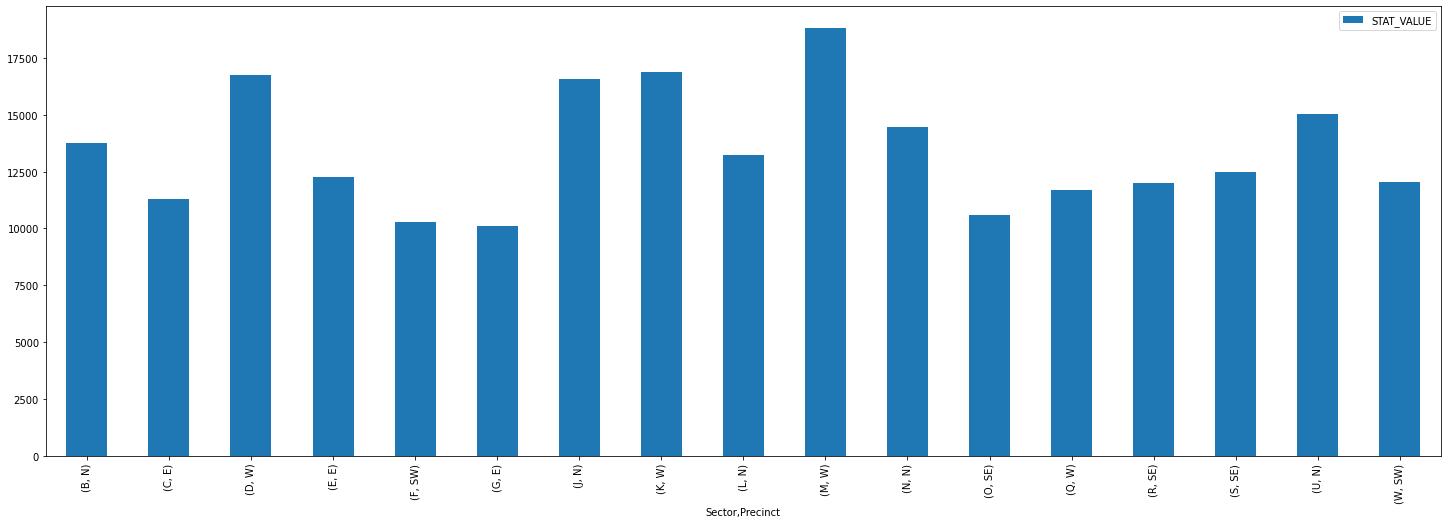

In [233]:
# Which Area has the most crime reports
numOfCrime_area = filtered_df2[['STAT_VALUE','Sector','Precinct']].groupby(['Sector','Precinct']).sum()
numOfCrime_area.plot.bar()

## What's the total cases of each crime type

,STAT_VALUE
CRIME_TYPE,
Assault,12437
Burglary,42792
Homicide,145
Larceny-Theft,139192
Motor Vehicle Theft,23395
Rape,678
Robbery,9665


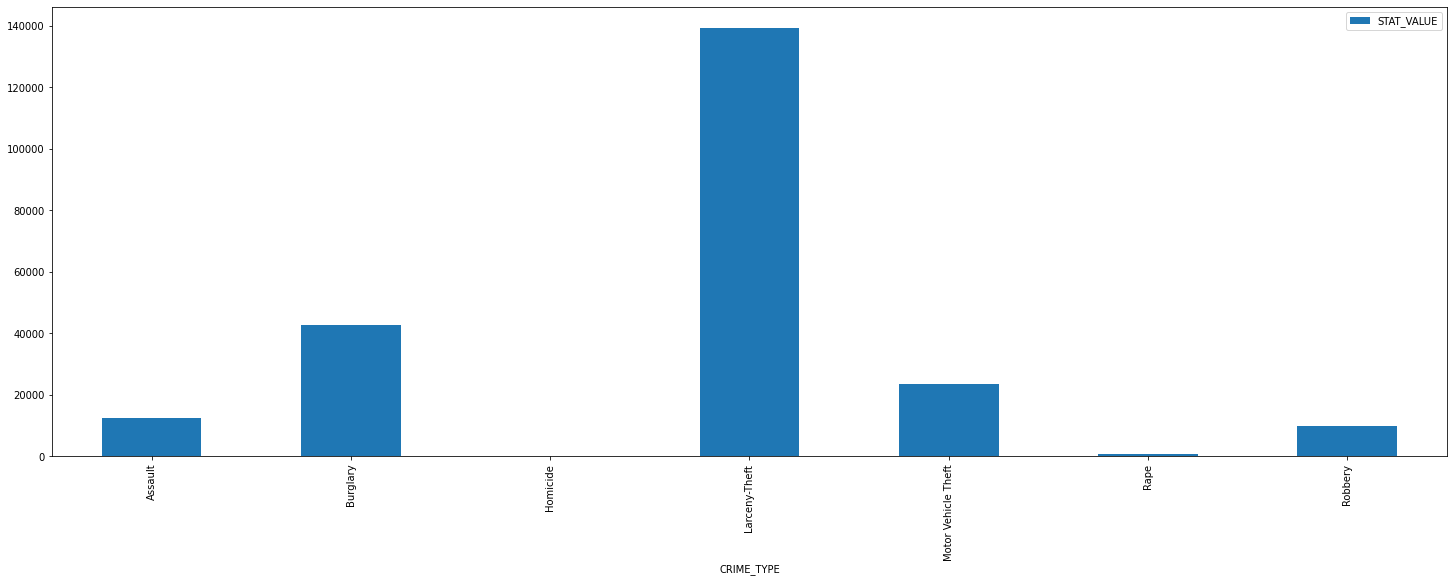

In [239]:
numOfCrime_crimeType = filtered_df2[['STAT_VALUE','CRIME_TYPE']].groupby(['CRIME_TYPE']).sum()
numOfCrime_crimeType.plot.bar()
numOfCrime_crimeType

# Dataset2 Finding

*   Springs had lower crime report
*   Falls had higher crime report
*   Area M,W is the most dangerous Area
*   Area (F,SW) and (G,E) are relatively safer
*   Larceny-Theft is the most commom crime type
